In [2]:



import matplotlib.pyplot as plt
import os 
import numpy as np
import pandas as pd



import backend_dl as dl
import gui_backend as be


In [3]:
#Comenzamos leyendo el dataset 

"""Recordatorio:

    "rest" -> 0
    "right_i" -> 1
    "left_i"->2
    "hands_i" -> 3
    "feet_i" -> 4
    "right_m" -> 5
    "left_m" -> 6
    "hands_m" -> 7
    "feet_m" -> 8
"""

data = np.load("finetunning/EEG_set50+8_dataset.npz", allow_pickle=True)
pick = [0,1,2,5,6] #Las clases que queremos elegir

"""En caso de querer entrenar distintas clases:
pick = [0,3,4,7,8] Rest, Manos y pies 
pick = [0,1,2,5,6] Rest, Derecha e Izquierda
pick = [0,1,2,3,4,5,6,7,8] Todas las clases 
Si quieren, también pueden evaluar dos clases si quitan el cero, en caso de querer evaluar rest vs no rest usen la celda 5
"""
 
X, y, sub = dl.pick(data, pick = pick, undersample_rest=False)  #Usamos solo 3 clases para acelerar el entrenamiento



y_lr = dl.fusionar(y) #Fusionamos las clases motoras e imaginarias

classes = len(np.unique(y_lr))


print("tamaño final: ", X.shape, y.shape, sub.shape)
print("Sujetos elegidos:", np.unique(sub))
print("Sujetos totales:", len(np.unique(sub)))
print("Clases anteriores:" , np.unique(y, return_counts=True))
print("Clases actuales:" , np.unique(y_lr, return_counts=True))



print("Dimensiones finales: ", np.unique(y_lr, return_counts=True))


#

tamaño final:  (119155, 15, 160) (119155,) (119155,)
Sujetos elegidos: [  1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 105]
Sujetos totales: 97
Clases anteriores: (array([0, 1, 2, 3, 4]), array([78510, 10100, 10300, 10095, 10150]))
Clases actuales: (array([0, 1, 2]), array([78510, 20195, 20450]))
Dimensiones finales:  (array([0, 1, 2]), array([78510, 20195, 20450]))


In [ ]:
#Modelo general: Acá vamos a elegir 50 sujetos para entrenar un modelo general, pueden ser menos si desean un modelo más sencillo


mask_model = (sub >= 9) & (sub <= 60) #Elegimos 50 sujetos de pruebas y los primeros 8 serán de finetunning

#Creamos el data para los sujetos a entrenar
X_modelo = X[mask_model]
y_modelo = y_lr[mask_model]
sub_modelo = sub[mask_model]

X_modelo, y_modelo, sub_modelo = dl.undersample(X_modelo, y_modelo, sub_modelo) #Ajustamos las clases para que no hayan sesgos

print("Total de sujetos: ",len(np.unique(sub_modelo)))
print("Total de sujetos: ",np.unique(sub_modelo, return_counts=True))
print("Dimensiones totales: ",X_modelo.shape, y_modelo.shape, sub_modelo.shape)

print("Distribución de clases:",np.unique(y_modelo, return_counts=True))
print(classes)


Total de sujetos:  49
Total de sujetos:  (array([ 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
      dtype=int32), array([379, 674, 684, 669, 696, 652, 698, 709, 685, 693, 458, 531, 576,
       220, 679, 699, 646, 581, 694, 716, 712, 510, 690, 700, 698, 576,
       688, 673, 616, 655, 688, 664, 359, 508, 682, 681, 127, 563, 686,
       676, 621, 634, 539, 675, 597, 669, 708, 675, 661]))
Dimensiones totales:  (30270, 15, 160) (30270,) (30270,)
Distribución de clases: (array([0, 1, 2]), array([10160,  9950, 10160]))
3


In [ ]:
"""
EN CASO DE USAR CLASES BINARIAS, EJECUTAR ESTE BLOQUE
"""
data = np.load("EEG_subset20_dataset.npz", allow_pickle=True)
X_fine, y_fine, sub_fine = dl.norest(data)
print("tamaño final: ", X.shape, y_lr.shape, sub.shape)
X_under, y_under, sub_under = dl.undersample(X_fine, y_fine, sub_fine) #Ajustamos las clases para que no hayan sesgos
print(np.unique(y_under, return_counts=True))
classes = 2

Entrenamos el modelo acá abajo: Vamos a entrenar con los datos generales primero y después afinamos algo

In [12]:
modelo, historial, mean, std, X_list, y_list = dl.eeg_train(X_modelo, y_modelo, sub_modelo, classes=classes, epochs = 100)

c:\Users\Josju\Downloads\temp tareas\OpenBCI\Deep Learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.3815 - loss: 1.0790 - val_accuracy: 0.4164 - val_loss: 1.0587
Epoch 2/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.4301 - loss: 1.0520 - val_accuracy: 0.4820 - val_loss: 1.0185
Epoch 3/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.4428 - loss: 1.0384 - val_accuracy: 0.4801 - val_loss: 1.0111
Epoch 4/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.4543 - loss: 1.0310 - val_accuracy: 0.4702 - val_loss: 1.0025
Epoch 5/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.4571 - loss: 1.0236 - val_accuracy: 0.5125 - val_loss: 0.9928
Epoch 6/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.4664 - loss: 1.0170 - val_accuracy: 0.4658 - val_loss: 0.9976
Epoch 7/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.4716 - loss: 1.0108 - val_accuracy: 0.4971 - val_loss: 0.9907
Epoch 8/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 39s 88ms/step - accuracy: 0.4819 - loss: 1

In [ ]:
#Guardamos el modelo y sus parámetros de normalización

save = r"modelos/v3/EEGnet_general_01256.keras"
#asegurarnos de que exista la carpeta 
if not os.path.exists(os.path.dirname(save)):
    os.makedirs(os.path.dirname(save))
modelo.save(save)
name = r"modelos/v3/EEGnet_general_01256.npz"
np.savez(name, mean=mean, std=std)

ACA TERMINO TODO EL ENTRENAMIENTO, LO DE ABAJO ES ARA REFINAMIENTO

In [5]:
#Cargar modelo en caso de que ya tenegamos uno guardado
from tensorflow.keras.models import load_model
modelo = load_model(r"modelos/v3/EEGnet_general_01256.keras")

datos = np.load("modelos/v2/EEGnet_pick01256_norm.npz", allow_pickle=True)

mean = datos['mean']
std = datos['std']

In [7]:
#Elegir al sujeto de finetunning
mask_fine = np.isin(sub, [7]) #El 7 fue el de mejor desempeño así que elijan siempre este 

#Elegimos solamente los datos del sujeto 100
X_fine = X[mask_fine]
y_fine = y_lr[mask_fine]
sub_fine = sub[mask_fine]

#Undersample de 0 a max[1,2]}

X_under, y_under, sub_under = dl.undersample(X_fine, y_fine, sub_fine) #Ajustamos las clases para que no hayan sesgos

print(len(np.unique(sub_fine)))
print(X_under.shape, y_under.shape, sub_under.shape)

print(np.unique(y_under, return_counts=True))
print(classes)


1
(680, 15, 160) (680,) (680,)
(array([0, 1, 2]), array([230, 220, 230]))
3


In [8]:
modelo_fined, historial, mean_fine, std_fine, X_list_fine, y_list_fine = dl.eeg_fine(modelo, X_under, y_under, sub_under, classes=classes, epochs=150)


Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.6176 - loss: 0.8706 - val_accuracy: 0.6029 - val_loss: 0.8699
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6324 - loss: 0.8693 - val_accuracy: 0.6324 - val_loss: 0.8620
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6397 - loss: 0.8488 - val_accuracy: 0.6324 - val_loss: 0.8543
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6213 - loss: 0.8603 - val_accuracy: 0.6471 - val_loss: 0.8470
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6507 - loss: 0.8442 - val_accuracy: 0.6324 - val_loss: 0.8399
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6526 - loss: 0.8512 - val_accuracy: 0.6471 - val_loss: 0.8330
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6452 - loss: 0.8110 - val_accuracy: 0.6471 - val_loss: 0.8265
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6636 - loss: 0.8134 - val_accuracy: 0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

=== Evaluación EEGnet finetunned ===
Clases (índice -> nombre):
  0: rest
  1: izquierda
  2: derecha

Matriz de confusión (conteos):
[[10  5  8]
 [ 0 20  2]
 [ 0  2 21]]

Reporte de clasificación:
              precision    recall  f1-score   support

        rest       1.00      0.43      0.61        23
   izquierda       0.74      0.91      0.82        22
     derecha       0.68      0.91      0.78        23

    accuracy                           0.75        68
   macro avg       0.81      0.75      0.73        68
weighted avg       0.81      0.75      0.73        68



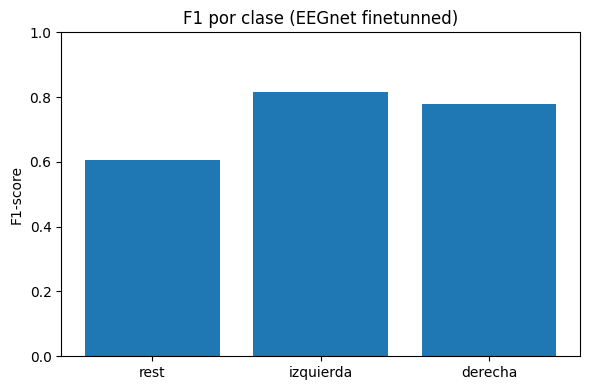

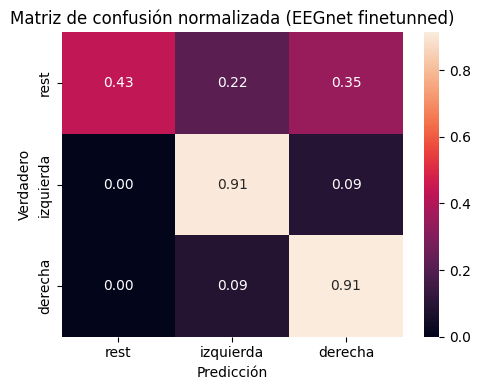

In [12]:
# Después de entrenar:
X_test = X_list_fine[2]
y_test = y_list_fine[2]
y_prob = modelo_fined.predict(X_test)

# Si tus etiquetas ya están remapeadas a 0..C-1 por pick,
# puedes pasar nombres de clase en ese mismo orden:
nombres = ["rest","izquierda", "derecha"]  # ejemplo para 3 clases

resultados = dl.evaluar_modelo_multiclase(
    y_true=y_test,
    y_prob=y_prob,
    class_names=nombres,          # o None si no quieres nombres
    title_prefix="EEGnet finetunned"
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

=== Evaluación EEGNet general ===
Clases (índice -> nombre):
  0: rest
  1: izquierda
  2: derecha

Matriz de confusión (conteos):
[[14  4  5]
 [ 8 13  1]
 [ 3  2 18]]

Reporte de clasificación:
              precision    recall  f1-score   support

        rest       0.56      0.61      0.58        23
   izquierda       0.68      0.59      0.63        22
     derecha       0.75      0.78      0.77        23

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68



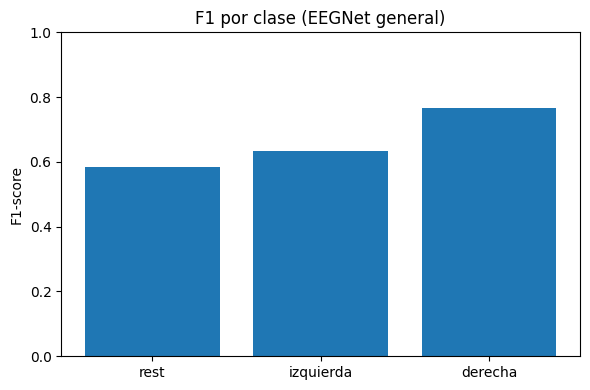

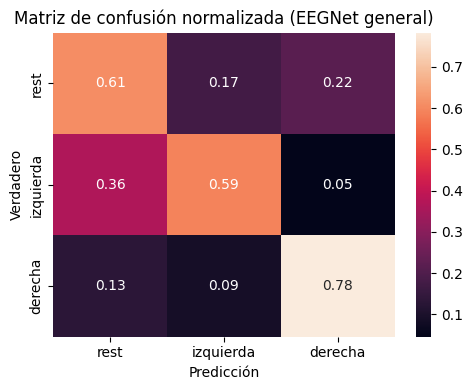

In [10]:
y_prob_gen = modelo.predict(X_test)



resultados = dl.evaluar_modelo_multiclase(
    y_true=y_test,
    y_prob=y_prob_gen,
    class_names=nombres,          # o None si no quieres nombres
    title_prefix="EEGNet general"
)

In [7]:
save_fin = r"modelos/fine_v2/EEGnet_fine_01256.keras"
#asegurarnos de que exista la carpeta 
if not os.path.exists(os.path.dirname(save_fin)):
    os.makedirs(os.path.dirname(save_fin))
modelo.save(save_fin)
name_fin = r"modelos/fine_v2/EEGnet_gfine_01256.npz"
np.savez(name_fin, mean=mean_fine, std=std_fine)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#Tridimensionar los datos para el clasificador clásico
X_train_vec = X_list_fine[0][..., 0]
X_val_vec = X_list_fine[1][..., 0]
X_test_vec = X_list_fine[2][..., 0]


X_train_vec = be.vectorizar(X_train_vec) 
X_test_vec = be.vectorizar(X_test_vec) 
X_val_vec = be.vectorizar(X_val_vec) 

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_vec)
X_test_norm  = scaler.transform(X_test_vec)
X_val_norm   = scaler.transform(X_val_vec)


print("tamaño inicial: ", X_list_fine[0].shape)
print("tamaño final: ", X_train_vec.shape)

rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train_norm, y_list_fine[0])

y_pred = rf_clf.predict(X_test_norm)

tamaño inicial:  (544, 15, 160, 1)
tamaño final:  (544, 2400)



=== Evaluación Random Forest 3 clases ===
Clases (índice interno -> nombre):
  0: rest
  1: izquierda
  2: derecha

Matriz de confusión (conteos):
[[13  4  6]
 [ 8  6  8]
 [ 2  9 12]]

Reporte de clasificación:
              precision    recall  f1-score   support

        rest       0.57      0.57      0.57        23
   izquierda       0.32      0.27      0.29        22
     derecha       0.46      0.52      0.49        23

    accuracy                           0.46        68
   macro avg       0.45      0.45      0.45        68
weighted avg       0.45      0.46      0.45        68



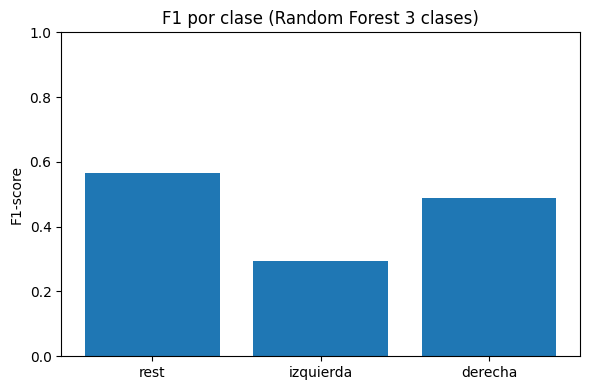

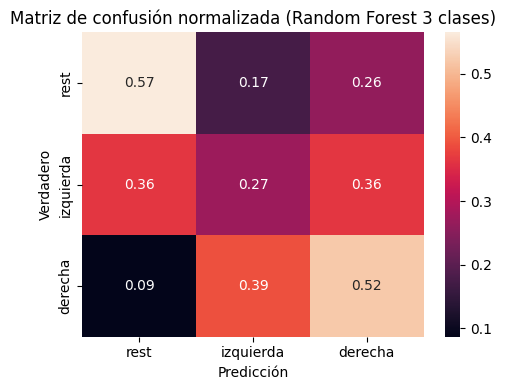

In [11]:
resultados_rf = dl.evaluar_rf(
    y_true=y_test,
    y_pred=y_pred,
    class_names=nombres,
    title_prefix="Random Forest 3 clases")

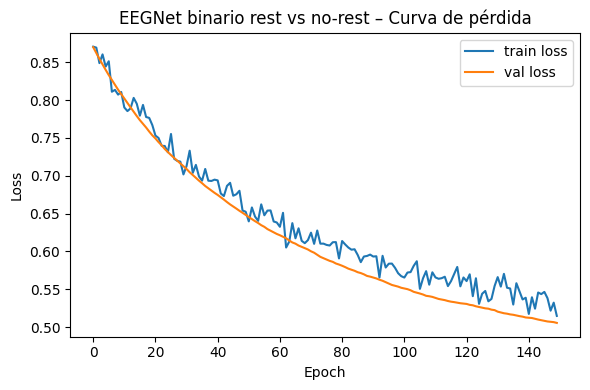

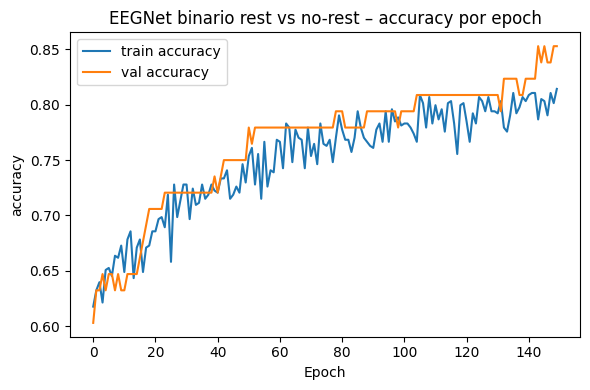

In [11]:
dl.plot_history(historial, metrics=("accuracy",), title_prefix="EEGNet binario rest vs no-rest")

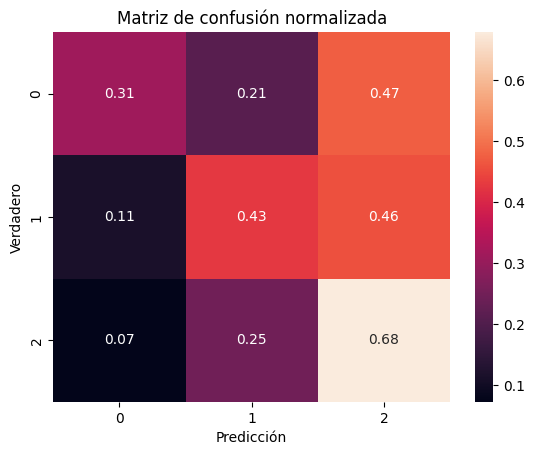

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure()
sns.heatmap(cm_norm, annot=True, fmt=".2f",
            xticklabels=["0","1", "2"],
            yticklabels=["0","1", "2"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de confusión normalizada")
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support
)

def evaluar_modelo_clasico(y_true, y_pred, class_names=None, title_prefix="Random Forest"):
    """
    y_true : array (N,) con etiquetas enteras 0..C-1
    y_pred : array (N,) con predicciones enteras 0..C-1
    class_names : lista opcional de nombres para las clases en orden 0..C-1
                  (si es None, usa "0","1",...)
    title_prefix : texto para los títulos de las figuras
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Detectamos clases presentes a partir de y_true (o el rango completo)
    labels = np.unique(y_true)
    n_classes = len(labels)

    if class_names is None:
        class_names = [str(l) for l in labels]

    print(f"\n=== Evaluación {title_prefix} ===")
    print("Clases (índice interno -> nombre):")
    for lab, name in zip(labels, class_names):
        print(f"  {lab}: {name}")

    # 1) Matriz de confusión (conteos)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print("\nMatriz de confusión (conteos):")
    print(cm)

    # 2) Reporte de clasificación
    print("\nReporte de clasificación:")
    print(
        classification_report(
            y_true, y_pred,
            labels=labels,
            target_names=class_names,
            zero_division=0
        )
    )

    # 3) F1 por clase
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_pred,
        labels=labels,
        zero_division=0
    )

    # ---- Plot F1 por clase ----
    plt.figure(figsize=(6, 4))
    plt.bar(np.arange(n_classes), f1)
    plt.xticks(np.arange(n_classes), class_names)
    plt.ylabel("F1-score")
    plt.ylim(0, 1)
    plt.title(f"F1 por clase ({title_prefix})")
    plt.tight_layout()
    plt.show()

    # ---- Matriz de confusión normalizada ----
    cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm_norm,
        annot=True,
        fmt=".2f",
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.title(f"Matriz de confusión normalizada ({title_prefix})")
    plt.tight_layout()
    plt.show()

    return {
        "cm": cm,
        "cm_norm": cm_norm,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "labels": labels,
    }


NO necesitamos standarizar por oneshot ni nada, ya todo esto es numérico